# 📊 Basic Graph Analysis in PyTorch Geometric

This notebook loads a graph from a JSON adjacency list, converts it to a PyTorch Geometric graph, and performs basic analysis and visualization.

In [19]:
# 📦 Imports
import json
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import os

In [20]:
# 📁 Load Graph from JSON
with open("karate_graph.json") as f:
    adj_dict = json.load(f)

usernames = sorted(adj_dict.keys())
user_to_idx = {u: i for i, u in enumerate(usernames)}
idx_to_user = {i: u for u, i in user_to_idx.items()}

edge_index = []
for user, neighbors in adj_dict.items():
    for neighbor in neighbors:
        edge_index.append([user_to_idx[user], user_to_idx[neighbor]])

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
x = torch.eye(len(usernames), dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
print(data)

Data(x=[35, 35], edge_index=[2, 159])


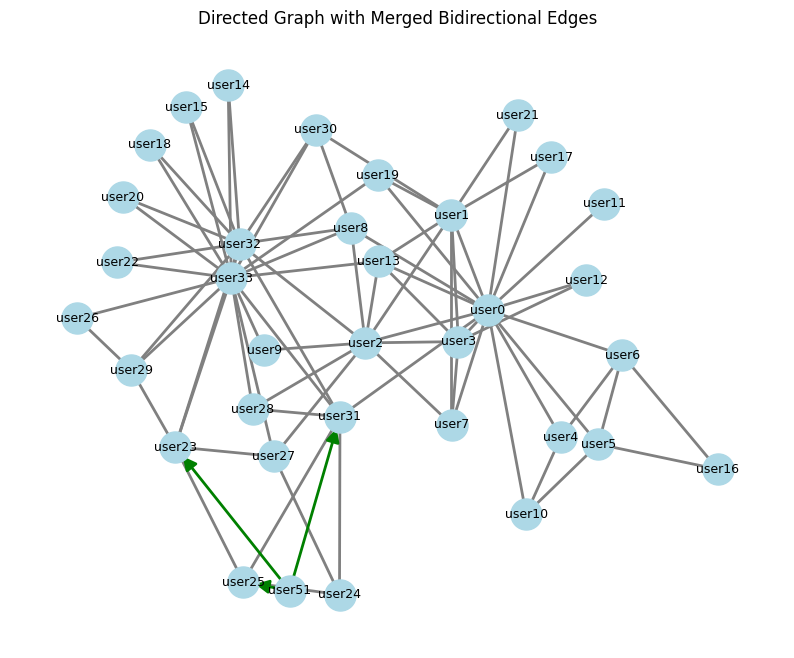

In [36]:
# 📉 Visualize: directed edges + merged bidirectional ones

# Convert PyG to directed NetworkX graph
G = to_networkx(data, to_undirected=False)
G = nx.relabel_nodes(G, idx_to_user)

plt.figure(figsize=(10, 8))
#pos = nx.spring_layout(G, seed=42)
pos = nx.kamada_kawai_layout(G)

# Identify bidirectional (mutual) edges
bidirectional = set()
one_way_edges = []

for u, v in G.edges():
    if (v, u) in G.edges():
        pair = tuple(sorted([u, v]))
        bidirectional.add(pair)
    else:
        one_way_edges.append((u, v))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

# Draw bidirectional edges (as undirected lines with symmetric arcs)
nx.draw_networkx_edges(G, pos, edgelist=list(bidirectional), edge_color='grey',arrows=False, width=2)

# Draw one-way edges (as arrows)
nx.draw_networkx_edges(G, pos, edgelist=one_way_edges, edge_color='green',arrows=True, arrowsize=20, width=2)

# Draw labels
nx.draw_networkx_labels(G, pos,font_size=9)

plt.title("Directed Graph with Merged Bidirectional Edges")
plt.axis("off")
plt.show()


In [37]:
# 📊 Basic Stats
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Compute in-degree centrality
in_deg = nx.in_degree_centrality(G)
sorted_in_deg = sorted(in_deg.items(), key=lambda x: x[1], reverse=True)
print("\nTop 5 nodes by in-degree centrality:")
for node, score in sorted_in_deg[:5]:
    print(f"{node}: {score:.3f}")

Number of nodes: 35
Number of edges: 159

Top 5 nodes by in-degree centrality:
user33: 0.500
user0: 0.471
user32: 0.353
user2: 0.294
user1: 0.265
